In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from numba import jit
import cmath, math, mpmath

In [3]:
def Function(z):
    return z**5

In [157]:
#@jit
def ComplexNumericalDifferentiation(function, z0, order = 1, h = 0.001):
    i = complex(0, 1)
    integral = complex(0, 0)
    phi = 0
    while phi < 2 * cmath.pi:
        integral += h * function(z0 + cmath.exp(i * phi)) * cmath.exp(-i * order * phi)
        phi += h
    integral /= (2 * cmath.pi)
    integral *= mpmath.fac(order)
    return integral

In [ ]:
#@jit
def ComplexNumericalDifferentiationNewtonCotesN(function, z0, order = 1, h = 0.001, N = 1):
    i = complex(0, 1)
    integral = complex(0, 0)
    phi = 0
    while phi < 2 * cmath.pi:
        integral += h * function(z0 + cmath.exp(i * phi)) * cmath.exp(-i * order * phi)
        phi += h
    integral /= (2 * cmath.pi)
    integral *= mpmath.fac(order)
    return integral

In [112]:
print(ComplexNumericalDifferentiation(Function, 2).real)

80.031507961122


In [161]:
true_value = 80
errors = {
    'h': [],
    'error': []
}
h = 10
for s in range(-7, 0, 1):
    ht = h ** s
    errors['h'].append(ht)
    value = float(ComplexNumericalDifferentiation(Function, 2, 1, ht).real)
    errors['error'].append(abs(true_value - value))
print(errors)

{'h': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1], 'error': [3.6153998763666095e-06, 2.6809721518361584e-05, 0.00018149202125528063, 0.0005682397477642098, 0.03150796112203125, 0.26355626263935505, 0.649836431911524]}


In [162]:
logerrors= {
    'h': np.log(errors['h']),
    'error': np.log(errors['error'])
}
logerrors

{'h': array([-16.11809565, -13.81551056, -11.51292546,  -9.21034037,
         -6.90775528,  -4.60517019,  -2.30258509]),
 'error': array([-12.53030809, -10.52674599,  -8.61429887,  -7.47296714,
         -3.45751503,  -1.33348841,  -0.43103459])}

No handles with labels found to put in legend.


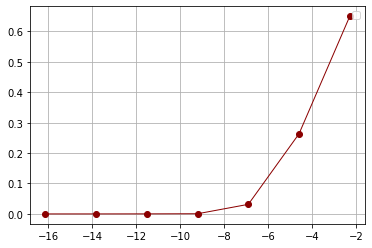

<Figure size 36000x36000 with 0 Axes>

In [164]:
plt.plot(logerrors['h'], errors['error'], color='#8b0000', marker='o', linewidth=1)#, label='заданные точки')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [50]:
def dF(z):
    return 5 * z ** 4

In [139]:
def ComplexModulus(z):
    return math.sqrt((z.real)**2+(z.imag)**2)

In [141]:
D = 20
err = np.zeros((2 * D + 1, 2 * D + 1))
for i in range(-D, D + 1):
    for j in range(-D, D + 1):  
        if ComplexModulus(complex(i, j)) == 0:
            value = ComplexNumericalDifferentiation(Function, complex(i,j), order=1, h=0.01)
        else:
            value = ComplexNumericalDifferentiation(Function, complex(i,j), order=1, h=0.01*(1/ComplexModulus(complex(i, j))))
        true_value = dF(complex(i, j))
        if true_value == 0:
            err[i][j] = 0
        else:
            err[i][j] = ComplexModulus((value - true_value) / true_value).real

In [137]:
fig = go.Figure(data=
    go.Contour(
        x=[i for i in range(-D, D + 1)],
        y=[j for j in range(-D, D + 1)],
        z=err,
        line_smoothing=0.85,
        colorscale='RdBu',
        colorbar=dict(
            title='', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')),
        contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'black',
            )
        )))

fig.update_layout(
    autosize=False,
    width=600,
    height=600
)

fig.update_xaxes(
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
'''
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
'''

fig.show()
